# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

#from statsmodels.tools.eval_measures import rmse

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
address = pd.read_excel('address_data.xlsx')

In [3]:
rental = pd.read_csv("history_rental_df.csv")



In [4]:
rental = rental[rental['r_model_check'] == 1]

In [5]:
rental['id'] = pd.to_numeric(rental.id)

In [6]:
df  = pd.merge(rental, address, on='id')

In [8]:
pwd

'/Users/ds/Desktop/UPWORK/RENTING_HOUSE'

In [9]:
ls

0. PRE-PROC-WANGLING-EDA/
1. Feature Engg/
Backup_Copy_of_Milestone_1.ipynb
Importance FEature.ipynb
Machine_Learning_Classification_Template.ipynb
Machine_Learning_Classification_Template.ipynb 
Milestone-1.ipynb
Milestone-1_source_code.ipynb
Milestone-2_building.ipynb
Refactored_Py_DS_ML_Bootcamp-master/
Untitled.ipynb
Untitled1.ipynb
addrese.csv
address.csv
address_data (10).xlsx
address_data.xlsx
demo.csv
history_rental.csv
history_rental_data (3).csv
history_rental_data (6).csv
history_rental_data (6).xlsx
history_rental_data.sql
history_rental_data_sample.xlsx
history_rental_df.csv
history_rental_df.xls
history_rental_df1.xls
history_rental_t.ods


### Importing the master dataset from (history_rental_data + address_data)

In [10]:
df.shape

(125347, 29)

In [11]:
df.id.nunique()

125347

In [12]:
df.columns

Index(['Unnamed: 0', 'id', 'address', 'unique_address_id', 'link', 'size',
       'buildingType', 'layout', 'standardized_layout', 'rent', 'elevator',
       'siteOwner', 'rent_out_time', 'totalFloors', 'totalApartments',
       'buildingMaterial', 'heating', 'heatingSource', 'removed_timestamp',
       'added_timestamp', 'buildingYear', 'property_id', 'r_model_check',
       'history_added_timestamp', 'ffqc', 'latitude', 'longitude', 'zip_code',
       'is_checked'],
      dtype='object')

## Data Preparation And  Data Understanding

In [13]:
df.head()

,Unnamed: 0,id,address,unique_address_id,link,size,buildingType,layout,standardized_layout,rent,...,added_timestamp,buildingYear,property_id,r_model_check,history_added_timestamp,ffqc,latitude,longitude,zip_code,is_checked
0,3,4,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,75,Kerrostalo,"3h, k, s",3.0,942,...,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0,61.49855,23.78102,33500,1
1,4,5,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51,Kerrostalo,"2h, kk, s",2.0,692,...,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0,61.47266,23.72352,33900,1
2,5,6,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,57,Kerrostalo,"2h, k, s",2.0,764,...,2/24/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.47148,23.75847,33900,1
3,6,7,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51,Kerrostalo,"2h, kk, s",2.0,692,...,8/14/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.45248,23.84164,33720,1
4,7,8,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,57,Kerrostalo,"2h, k, s",2.0,749,...,10/10/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.49996,23.74870,33210,1


In [14]:
df['id'] = pd.to_numeric(df.id)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125347 entries, 0 to 125346
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               125347 non-null  int64  
 1   id                       125347 non-null  int64  
 2   address                  125347 non-null  object 
 3   unique_address_id        125347 non-null  float64
 4   link                     125347 non-null  object 
 5   size                     125347 non-null  object 
 6   buildingType             125347 non-null  object 
 7   layout                   125347 non-null  object 
 8   standardized_layout      122181 non-null  float64
 9   rent                     125347 non-null  object 
 10  elevator                 125347 non-null  object 
 11  siteOwner                118022 non-null  object 
 12  rent_out_time            110938 non-null  object 
 13  totalFloors              125347 non-null  object 
 14  tota

Data 

# Cleaning the columns

### For h_size

In [16]:
# Rename the size as h_size
df.rename(columns={"size":"h_size"},inplace =True)

In [17]:
df.columns

Index(['Unnamed: 0', 'id', 'address', 'unique_address_id', 'link', 'h_size',
       'buildingType', 'layout', 'standardized_layout', 'rent', 'elevator',
       'siteOwner', 'rent_out_time', 'totalFloors', 'totalApartments',
       'buildingMaterial', 'heating', 'heatingSource', 'removed_timestamp',
       'added_timestamp', 'buildingYear', 'property_id', 'r_model_check',
       'history_added_timestamp', 'ffqc', 'latitude', 'longitude', 'zip_code',
       'is_checked'],
      dtype='object')

In [18]:
df.h_size.str.isnumeric().isnull().sum()

27223

In [19]:
df.unique_address_id.value_counts().head()

1115.0     351
8918.0     314
11227.0    303
788.0      302
3080.0     283
Name: unique_address_id, dtype: int64

In [20]:
df.standardized_layout.value_counts().head()

2.0    52373
1.0    48231
3.0    16977
4.0     3957
5.0      546
Name: standardized_layout, dtype: int64

In [21]:
df[['address', 'unique_address_id']].tail(10)

,address,unique_address_id
125337,Vuorimiehenkatu 33 Helsinki,10847.0
125338,Vuorimiehenkatu 33 Helsinki,10847.0
125339,Vuorimiehenkatu 33 Helsinki,10847.0
125340,Vuorimiehenkatu 33 Helsinki,10847.0
125341,Vuorimiehenkatu 33 Helsinki,10847.0
125342,Vuorimiehenkatu 33 Helsinki,10847.0
125343,Vuorimiehenkatu 33 Helsinki,10847.0
125344,Vuorimiehenkatu 33 Helsinki,10847.0
125345,Vuorimiehenkatu 33 Helsinki,10847.0
125346,Vuorimiehenkatu 33 Helsinki,10847.0


In [22]:
df.address.nunique()

4177

In [23]:
df.unique_address_id.nunique()

4177

In [24]:
df.elevator.value_counts()

On             84563
Ei tiedossa    36861
Ei hissiä       3923
Name: elevator, dtype: int64

In [25]:
df.siteOwner.value_counts()

Oma          90701
Vuokralla    27321
Name: siteOwner, dtype: int64

In [26]:
df.rent_out_time.value_counts()

1      6029
4      5673
3      5623
6      5599
5      5353
       ... 
494       1
497       1
362       1
396       1
551       1
Name: rent_out_time, Length: 548, dtype: int64

In [27]:
df.heating.value_counts().head()

Vesikeskuslämmitys     122338
Suora sähkölämmitys       692
Uunilämmitys              379
Ilmakeskuslämmitys        226
Name: heating, dtype: int64

In [28]:
df.heatingSource.value_counts().head()

Kauko- tai aluelämpö    114459
Kevyt polttoöljy          5052
Raskas polttoöljy         1929
Sähkö                      903
Maalämpö tms.              767
Name: heatingSource, dtype: int64

In [29]:
df.buildingYear.value_counts()

1962.0    4477
1961.0    4246
1963.0    3735
1928.0    3384
1960.0    2886
          ... 
1921.0      26
1899.0      21
1897.0      20
1865.0      14
1880.0       7
Name: buildingYear, Length: 129, dtype: int64

In [30]:
# Dropping the rows with all null values in the row
df = df.dropna(how='all',axis =0)

In [31]:
for i in df[df.totalFloors == 'Ei tiedossa'].index:
    df.drop([i],inplace = True)

In [32]:
df['totalFloors'] = pd.to_numeric(df.totalFloors)

In [33]:
df['h_size'] = pd.to_numeric(df.h_size)

In [34]:
df['rent_out_time'] = pd.to_numeric(df.rent_out_time)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120946 entries, 0 to 125346
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               120946 non-null  int64  
 1   id                       120946 non-null  int64  
 2   address                  120946 non-null  object 
 3   unique_address_id        120946 non-null  float64
 4   link                     120946 non-null  object 
 5   h_size                   120946 non-null  float64
 6   buildingType             120946 non-null  object 
 7   layout                   120946 non-null  object 
 8   standardized_layout      117828 non-null  float64
 9   rent                     120946 non-null  object 
 10  elevator                 120946 non-null  object 
 11  siteOwner                115197 non-null  object 
 12  rent_out_time            106880 non-null  float64
 13  totalFloors              120946 non-null  int64  
 14  tota

In [36]:
df.rent.dropna(axis = 0,inplace=True)

In [37]:
df['rent'] = pd.to_numeric(df.rent)

In [38]:
df.head()

,Unnamed: 0,id,address,unique_address_id,link,h_size,buildingType,layout,standardized_layout,rent,...,added_timestamp,buildingYear,property_id,r_model_check,history_added_timestamp,ffqc,latitude,longitude,zip_code,is_checked
0,3,4,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,75.0,Kerrostalo,"3h, k, s",3.0,942,...,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0,61.49855,23.78102,33500,1
1,4,5,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51.0,Kerrostalo,"2h, kk, s",2.0,692,...,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0,61.47266,23.72352,33900,1
2,5,6,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,57.0,Kerrostalo,"2h, k, s",2.0,764,...,2/24/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.47148,23.75847,33900,1
3,6,7,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51.0,Kerrostalo,"2h, kk, s",2.0,692,...,8/14/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.45248,23.84164,33720,1
4,7,8,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,57.0,Kerrostalo,"2h, k, s",2.0,749,...,10/10/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.49996,23.74870,33210,1


In [39]:
df.buildingType.value_counts()

Kerrostalo    118684
Rivitalo        1574
Luhtitalo        688
Name: buildingType, dtype: int64

In [40]:
df.columns

Index(['Unnamed: 0', 'id', 'address', 'unique_address_id', 'link', 'h_size',
       'buildingType', 'layout', 'standardized_layout', 'rent', 'elevator',
       'siteOwner', 'rent_out_time', 'totalFloors', 'totalApartments',
       'buildingMaterial', 'heating', 'heatingSource', 'removed_timestamp',
       'added_timestamp', 'buildingYear', 'property_id', 'r_model_check',
       'history_added_timestamp', 'ffqc', 'latitude', 'longitude', 'zip_code',
       'is_checked'],
      dtype='object')

In [41]:
X = df[['unique_address_id', 'h_size', 'buildingType', 'standardized_layout',  'elevator', 'siteOwner',
       'rent_out_time', 'totalFloors', 'totalApartments', 'buildingMaterial',
       'heating', 'heatingSource', 'latitude', 'longitude',
       'buildingYear',]]
y = df[['rent']]

# Checking for Null Values

In [42]:
X.isnull().sum()

unique_address_id          0
h_size                     0
buildingType               0
standardized_layout     3118
elevator                   0
siteOwner               5749
rent_out_time          14066
totalFloors                0
totalApartments            0
buildingMaterial         359
heating                  191
heatingSource            278
latitude                   0
longitude                  0
buildingYear             728
dtype: int64

In [43]:
X.shape

(120946, 15)

In [44]:
y.shape

(120946, 1)

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120946 entries, 0 to 125346
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   unique_address_id    120946 non-null  float64
 1   h_size               120946 non-null  float64
 2   buildingType         120946 non-null  object 
 3   standardized_layout  117828 non-null  float64
 4   elevator             120946 non-null  object 
 5   siteOwner            115197 non-null  object 
 6   rent_out_time        106880 non-null  float64
 7   totalFloors          120946 non-null  int64  
 8   totalApartments      120946 non-null  float64
 9   buildingMaterial     120587 non-null  object 
 10  heating              120755 non-null  object 
 11  heatingSource        120668 non-null  object 
 12  latitude             120946 non-null  float64
 13  longitude            120946 non-null  float64
 14  buildingYear         120218 non-null  float64
dtypes: float64(8), in

In [46]:
X.standardized_layout.value_counts()

2.0    50396
1.0    46809
3.0    16181
4.0     3816
5.0      532
6.0       81
7.0       13
Name: standardized_layout, dtype: int64

In [47]:
X.isnull().sum()

unique_address_id          0
h_size                     0
buildingType               0
standardized_layout     3118
elevator                   0
siteOwner               5749
rent_out_time          14066
totalFloors                0
totalApartments            0
buildingMaterial         359
heating                  191
heatingSource            278
latitude                   0
longitude                  0
buildingYear             728
dtype: int64

In [48]:
X.standardized_layout.fillna(3.0,inplace = True)

In [49]:
X.rent_out_time.fillna(2.0,inplace = True)

In [50]:
X.siteOwner.fillna('Vuokralla',inplace=True)

In [51]:
X.totalApartments.fillna(24.0,inplace = True)

In [52]:
X.buildingMaterial.fillna('Tiili',inplace = True)

In [53]:
X.heating.fillna('Suora sähkölämmitys',inplace=True)

In [54]:
X.heatingSource.fillna('Kevyt polttoöljy',inplace =True)

In [55]:
X.buildingYear.fillna(1960.0,inplace=True)

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120946 entries, 0 to 125346
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   unique_address_id    120946 non-null  float64
 1   h_size               120946 non-null  float64
 2   buildingType         120946 non-null  object 
 3   standardized_layout  120946 non-null  float64
 4   elevator             120946 non-null  object 
 5   siteOwner            120946 non-null  object 
 6   rent_out_time        120946 non-null  float64
 7   totalFloors          120946 non-null  int64  
 8   totalApartments      120946 non-null  float64
 9   buildingMaterial     120946 non-null  object 
 10  heating              120946 non-null  object 
 11  heatingSource        120946 non-null  object 
 12  latitude             120946 non-null  float64
 13  longitude            120946 non-null  float64
 14  buildingYear         120946 non-null  float64
dtypes: float64(8), in

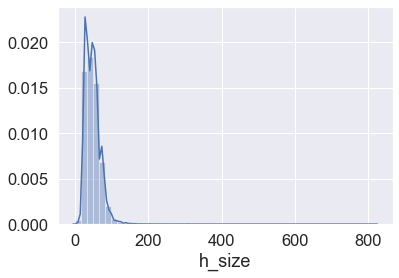

In [57]:
sns.distplot(X['h_size'])

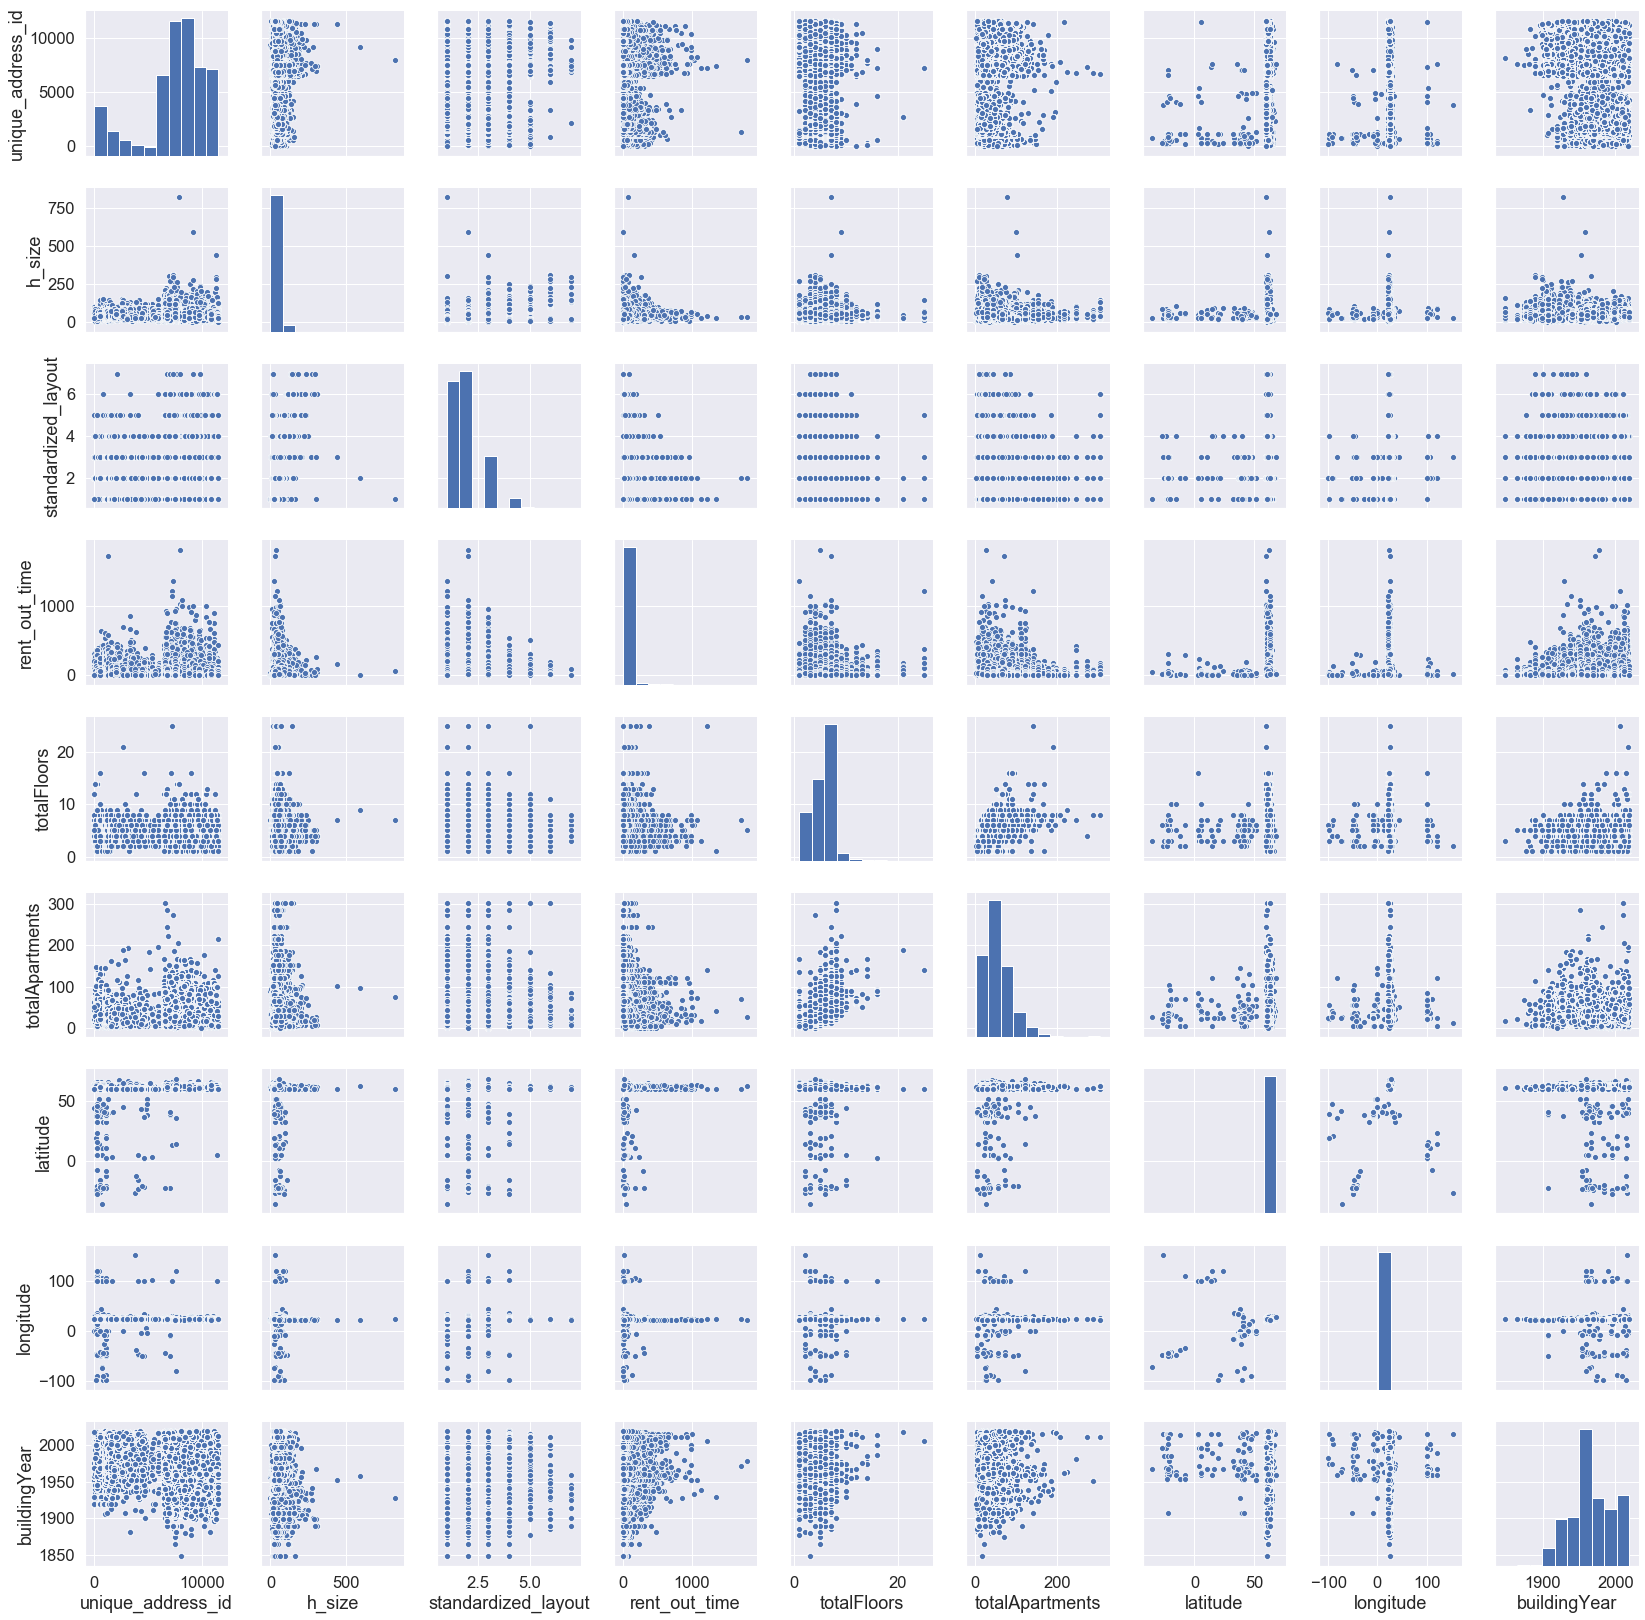

In [58]:
sns.pairplot(X)

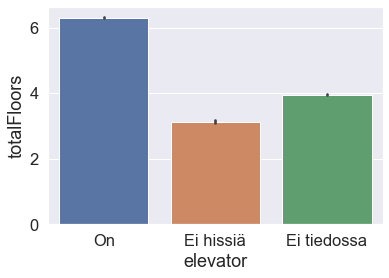

In [59]:
sns.barplot(x='elevator',y='totalFloors',data=X)

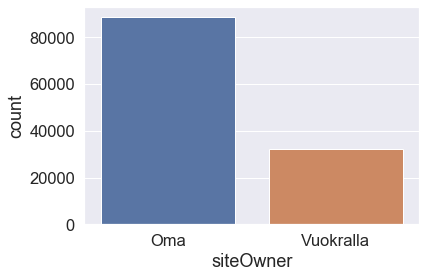

In [60]:
sns.countplot(x='siteOwner',data=X)

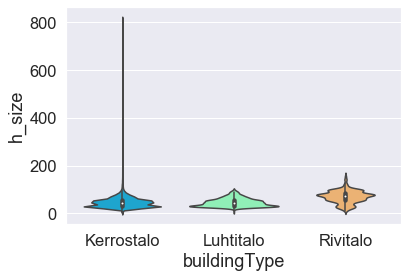

In [61]:
sns.violinplot(x="buildingType", y="h_size", data=X,palette='rainbow')

In [62]:
dummy_cities=pd.get_dummies(X[['buildingType','elevator','siteOwner',
                               'buildingMaterial','heating','heatingSource']])
X=pd.concat([X,dummy_cities],axis=1)



In [63]:
X.drop(['buildingType','elevator','siteOwner',
        'buildingMaterial','heating','heatingSource'],axis = 1,inplace =True)

In [64]:
X.head()

,unique_address_id,h_size,standardized_layout,rent_out_time,totalFloors,totalApartments,latitude,longitude,buildingYear,buildingType_Kerrostalo,...,heating_Vesikeskuslämmitys,heatingSource_Kaasu,heatingSource_Kauko- tai aluelämpö,heatingSource_Kevyt polttoöljy,"heatingSource_Kivihiili, koksi tms.",heatingSource_Maalämpö tms.,heatingSource_Puu,heatingSource_Raskas polttoöljy,heatingSource_Sähkö,heatingSource_Turve
0,288.0,75.0,3.0,13.0,6,27.0,61.49855,23.78102,1995.0,1,...,1,0,1,0,0,0,0,0,0,0
1,288.0,51.0,2.0,23.0,6,27.0,61.47266,23.72352,1995.0,1,...,1,0,1,0,0,0,0,0,0,0
2,288.0,57.0,2.0,5.0,6,27.0,61.47148,23.75847,1995.0,1,...,1,0,1,0,0,0,0,0,0,0
3,288.0,51.0,2.0,8.0,6,27.0,61.45248,23.84164,1995.0,1,...,1,0,1,0,0,0,0,0,0,0
4,288.0,57.0,2.0,12.0,6,27.0,61.49996,23.74870,1995.0,1,...,1,0,1,0,0,0,0,0,0,0


In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120946 entries, 0 to 125346
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   unique_address_id                    120946 non-null  float64
 1   h_size                               120946 non-null  float64
 2   standardized_layout                  120946 non-null  float64
 3   rent_out_time                        120946 non-null  float64
 4   totalFloors                          120946 non-null  int64  
 5   totalApartments                      120946 non-null  float64
 6   latitude                             120946 non-null  float64
 7   longitude                            120946 non-null  float64
 8   buildingYear                         120946 non-null  float64
 9   buildingType_Kerrostalo              120946 non-null  uint8  
 10  buildingType_Luhtitalo               120946 non-null  uint8  
 11  buildingType_

In [66]:
X.shape

(120946, 35)

In [67]:
y.shape

(120946, 1)

# Feature Engineering

In [68]:
# Decision Tree Regressor
%time
# Importing the model from scikit learn tree
from sklearn.tree import DecisionTreeRegressor
dfregressor = DecisionTreeRegressor()
modeldt = dfregressor.fit(X,y)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs


In [69]:
importances = list(modeldt.feature_importances_)
importances

[0.18202951487609276,
 0.5583982703331964,
 0.013130740248630302,
 0.02319622747055346,
 0.02379547358567547,
 0.038055466629642015,
 0.029130251496126122,
 0.027883581031981415,
 0.0812770048225832,
 0.00021035211453208628,
 4.400374886427346e-05,
 0.0002419861818942628,
 8.431449576694358e-05,
 0.00222599606106358,
 0.0011641890314376846,
 0.0012182567852687155,
 0.006393198922993221,
 0.0011508984753263376,
 1.7075994425499517e-05,
 0.001310940716445508,
 4.4827814114224104e-05,
 0.0017371729545838368,
 0.00042539493412560136,
 2.9285860615357968e-05,
 1.9368727928790157e-06,
 0.0002766603147916909,
 0.00014698860606389793,
 0.005376514788195907,
 0.00047156370410514174,
 0.00020101083342978818,
 0.00014656653886865672,
 2.653633232891388e-06,
 0.00012768384860641722,
 5.399627397434098e-05,
 0.0]

In [70]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances

[('unique_address_id', 0.18),
 ('h_size', 0.56),
 ('standardized_layout', 0.01),
 ('rent_out_time', 0.02),
 ('totalFloors', 0.02),
 ('totalApartments', 0.04),
 ('latitude', 0.03),
 ('longitude', 0.03),
 ('buildingYear', 0.08),
 ('buildingType_Kerrostalo', 0.0),
 ('buildingType_Luhtitalo', 0.0),
 ('buildingType_Rivitalo', 0.0),
 ('elevator_Ei hissiä', 0.0),
 ('elevator_Ei tiedossa', 0.0),
 ('elevator_On', 0.0),
 ('siteOwner_Oma', 0.0),
 ('siteOwner_Vuokralla', 0.01),
 ('buildingMaterial_Betoni', 0.0),
 ('buildingMaterial_Ei tiedossa', 0.0),
 ('buildingMaterial_Puu', 0.0),
 ('buildingMaterial_Teräs', 0.0),
 ('buildingMaterial_Tiili', 0.0),
 ('heating_Ilmakeskuslämmitys', 0.0),
 ('heating_Suora sähkölämmitys', 0.0),
 ('heating_Uunilämmitys', 0.0),
 ('heating_Vesikeskuslämmitys', 0.0),
 ('heatingSource_Kaasu', 0.0),
 ('heatingSource_Kauko- tai aluelämpö', 0.01),
 ('heatingSource_Kevyt polttoöljy', 0.0),
 ('heatingSource_Kivihiili, koksi tms.', 0.0),
 ('heatingSource_Maalämpö tms.', 0.0),
 

In [71]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('h_size', 0.56),
 ('unique_address_id', 0.18),
 ('buildingYear', 0.08),
 ('totalApartments', 0.04),
 ('latitude', 0.03),
 ('longitude', 0.03),
 ('rent_out_time', 0.02),
 ('totalFloors', 0.02),
 ('standardized_layout', 0.01),
 ('siteOwner_Vuokralla', 0.01),
 ('heatingSource_Kauko- tai aluelämpö', 0.01),
 ('buildingType_Kerrostalo', 0.0),
 ('buildingType_Luhtitalo', 0.0),
 ('buildingType_Rivitalo', 0.0),
 ('elevator_Ei hissiä', 0.0),
 ('elevator_Ei tiedossa', 0.0),
 ('elevator_On', 0.0),
 ('siteOwner_Oma', 0.0),
 ('buildingMaterial_Betoni', 0.0),
 ('buildingMaterial_Ei tiedossa', 0.0),
 ('buildingMaterial_Puu', 0.0),
 ('buildingMaterial_Teräs', 0.0),
 ('buildingMaterial_Tiili', 0.0),
 ('heating_Ilmakeskuslämmitys', 0.0),
 ('heating_Suora sähkölämmitys', 0.0),
 ('heating_Uunilämmitys', 0.0),
 ('heating_Vesikeskuslämmitys', 0.0),
 ('heatingSource_Kaasu', 0.0),
 ('heatingSource_Kevyt polttoöljy', 0.0),
 ('heatingSource_Kivihiili, koksi tms.', 0.0),
 ('heatingSource_Maalämpö tms.', 0.0),
 

In [73]:
for i in range(9):
    print(feature_importances[i][0])



h_size
unique_address_id
buildingYear
totalApartments
latitude
longitude
rent_out_time
totalFloors
standardized_layout


In [74]:
X = df[['h_size',
'unique_address_id',
'buildingYear',
'totalApartments',
'latitude',
'longitude',
'rent_out_time',
'totalFloors',
'standardized_layout']]

In [75]:
y.shape

(120946, 1)

In [76]:
X.shape

(120946, 9)

### Splitting the dataset

In [77]:
%time
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=1)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [78]:
print("X_train :-{} \nX_test :-{}\ny_train :-{}\ny_test :-{}".format(X_train.shape,
                                                             X_test.shape,y_train.shape,y_test.shape))

X_train :-(84662, 9) 
X_test :-(36284, 9)
y_train :-(84662, 1)
y_test :-(36284, 1)


# Random Forest Regressor

In [79]:
%time
# Importing the RF model from scikit learn ensemble 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model = regressor.fit(X,y)



CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [80]:
y_predtra = model.predict(X_train)

NameError: name 'model' is not defined

In [189]:
print('r2 value                      : ', metrics.r2_score(y_train, y_predtra)*100)

r2 value                      :  98.85111206751476


In [181]:
# Predicting the values on independent variables testing dataset
y_pred = regressor.predict(X_test)

In [182]:
y_pred.shape

(36284,)

In [183]:

print('Mean Abs Error   MAE          : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE            : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE       : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Sq  log Error RMSLE : ', np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))*1000)
print('r2 value                      : ', metrics.r2_score(y_test, y_pred)*100)

Mean Abs Error   MAE          :  19.538144707514615
Mean Sq  Error MSE            :  1208.9915479495903
Root Mean Sq Error RMSE       :  34.770555761298816
Root Mean Sq  log Error RMSLE :  37.93181307165206
r2 value                      :  98.86793403023186


In [184]:
# Cross validation score of 10 Kfolds
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator =regressor,X=X_train,y=y_train,cv=10)
accuracy

array([0.908, 0.911, 0.893, 0.885, 0.912, 0.907, 0.912, 0.914, 0.903,
       0.915])

In [185]:
print('The mean accuracy for 10 Kfold :',accuracy.mean())

The mean accuracy for 10 Kfold : 0.9060301393581126


In [186]:
print("The standard deviation of the DT model :",accuracy.std())

The standard deviation of the DT model : 0.009456662603693336


In [187]:
X.shape

(120946, 35)

In [91]:
y.shape

(146880, 1)

# RandomizedSearchCV

In [244]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestRegressor(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,20],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':["mae","mse"],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,3),
              }

In [245]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score



In [246]:
X.shape

(120946, 35)

In [247]:
y.shape

(120946, 1)

In [248]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X, y)

KeyboardInterrupt: 

In [ ]:
rf_parameters

In [ ]:
rf_ht_score

# XGBoost Model

In [238]:
%time
# Importing the XGBoost model from scikit learn ensemble 
from xgboost import XGBRegressor
classifier = XGBRegressor(n_estimators=100)
modelxg = classifier.fit(X,y)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 27.9 µs


In [239]:
# Predicting the values on independent variables testing dataset
y_pred1 = modelxg.predict(X_test)

In [240]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('Root Mean Sq  log Error RMSLE : ', np.sqrt(metrics.mean_squared_log_error(y_test, y_pred1))*1000)
print('r2 value                : ', metrics.r2_score(y_test, y_pred1)*100)

Mean Abs Error   MAE    :  102.64149627921049
Mean Sq  Error MSE      :  21953.684381744988
Root Mean Sq Error RMSE :  148.16775756467732
Root Mean Sq  log Error RMSLE :  165.7671182982786
r2 value                :  79.4431821779453


In [241]:
# Cross validation score of 10 Kfolds
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator =dfregressor,X=X_train,y=y_train,cv=10)
accuracy

array([0.835, 0.844, 0.802, 0.814, 0.842, 0.806, 0.836, 0.834, 0.833,
       0.844])

In [242]:
print('The mean accuracy for 10 Kfold :',accuracy.mean())

The mean accuracy for 10 Kfold : 0.8290060467690831


In [243]:
print("The standard deviation of the DT model :",accuracy.std())

The standard deviation of the DT model : 0.014874220618069752


import pickle
pickle.dump(modelxg,open("xgmodel.md1","wb"))

# The Champion model out of all Models is XGBoost

Note : Here I have build models on train.csv by split into train_test_split and predict on train.csv
       But for Kaggle submission I have predict my models on kaggle test.csv dataset and get the accuracy score          metric of 77% on kaggle.